In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
import sys

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [2]:
print(len(X_train),len(X_test))

60000 10000


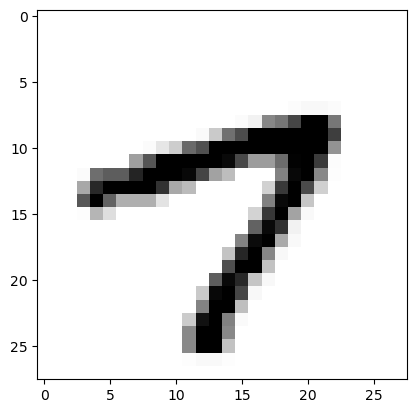

In [3]:
plt.imshow(X_train[101],cmap=plt.cm.gray_r)


In [4]:
import sys
# 컴퓨터의 저장된 이미지의 각 값
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' % i)
    sys.stdout.write('\n')


0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [5]:
print(X_train.shape)

X_train = X_train.reshape(X_train.shape[0], 28*28)
# X_train = X_train.reshape(len(X_train), -1)  # 위와 동일
print(X_train.shape)

X_train = X_train.astype('float64')  # float64로 변환
X_train = X_train / 255 


(60000, 28, 28)
(60000, 784)


In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 위에 있는 모든 명령어를 한줄로 만들기
X_train = X_train.reshape(X_train.shape[0], -1).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], -1).astype('float64') / 255


from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)  # 10은 클래스의 개수 설정
y_test = to_categorical(y_test, 10)


In [11]:
early_stopping = EarlyStopping(patience=10, verbose=1)
# checkpoint =  ModelCheckpoint(filepath ='data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5', monitor='val_loss', verbose=0, save_best_only=True)

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(300, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, verbose=0, validation_split=0.25, batch_size=200, callbacks=[early_stopping])# fit model을 history로 지정

print(model.evaluate(X_test, y_test, verbose=1))


Epoch 21: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9819
[0.06987439841032028, 0.9818999767303467]


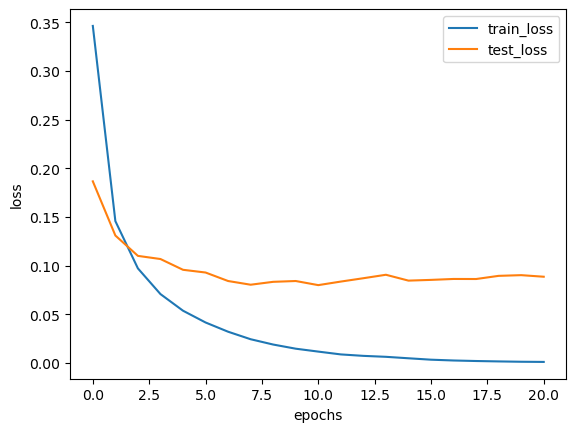

In [12]:
#그래프로 표현
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, label='train_loss')
plt.plot(x_len, y_vloss, label='test_loss')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
